## Шаг 1. Открытие файла и изучение информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
df = pd.read_csv('/datasets/games.csv')
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11495,Sniper: Ghost Warrior 2,PC,2013.0,Shooter,0.02,0.05,0.00,0.01,52.0,5.8,M
5867,Looney Tunes: Duck Amuck,DS,2007.0,Action,0.28,0.00,0.00,0.02,66.0,tbd,E
3557,Titanfall,PC,2014.0,Shooter,0.22,0.30,0.00,0.04,86.0,6.2,M
135,Red Dead Redemption,X360,2010.0,Action,3.70,1.95,0.09,0.58,95.0,9,M
13957,FIFA World Cup Germany 2006,DS,2006.0,Sports,0.03,0.00,0.00,0.00,71.0,7.2,E
6084,Bratz: Super Babyz,DS,2008.0,Action,0.26,0.00,0.00,0.02,50.0,tbd,E
2858,Fear Effect,PS,1998.0,Action,0.40,0.27,0.00,0.05,NaN,NaN,NaN
9503,Science Papa,Wii,2009.0,Misc,0.11,0.01,0.00,0.01,NaN,tbd,E
10005,F1 Racing Championship,PS,2000.0,Racing,0.06,0.04,0.00,0.01,NaN,NaN,NaN
11096,Pachitte Chonmage Tatsujin 10: Pachinko Fuyu n...,PS2,2007.0,Misc,0.00,0.00,0.09,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**

Всего в таблице 11 столбцев с разными типами данных. Разберем какие в df столбцы и какую информацию они содержат:
* Name — название игры             **(пропуски 2)**
* Platform — платформа 
* Year_of_Release — год выпуска    **(пропуски, поменять на целочисленный тип)**
* Genre — жанр игры               **(пропуски 2)**
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100) **(пропуски, поменять целочисленный тип)**
* User_Score — оценка пользователей (максимум 10) **(пропуски, округлить до десятичных, поменять тип данных)**
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. **(пропуски)**


На первом этапе необходимо изменить названия столбцов (привести все названия к нижнем регистру), заменить тип данных (год выпуска, оценка критиков и оценка пользователей), а также обработать оставшиеся пропущенные значения в оценках критиков и рейтинге ESRB.

https://pythonru.com/osnovy/znachenija-iskljuchenij-i-oshibok-v-python

## Шаг 2. Предобработка данных

### Замена названия столбцов (приведем к нижнему регистру)

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('float') #Int64
#df['user_score'] = df['user_score'].astype(float)

При изменение типа данных в столбце user_score выдает ошибку 'tbd'. Разберемся

In [9]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
0.3       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Аббревиатура tbd расшифровывается очень просто - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр когда разработчик игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например To Be Done - "должно быть сделано", или To Be Discussed - "подлежит обсуждению". 
То есть, данные были нарочно не заполнены, так как не определились с рейтингом, поэтому заменим tbd на Nan.

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [11]:
df['user_score'] = df['user_score'].astype(float)

### Обработка пропусков

#### Name и Genre

Рассмотрим пропуски в столбце Name и Genre

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
print('Доля пропущенных значений в:', 2/16715)

Доля пропущенных значений в: 0.00011965300628178283


Можем удалить данные строки

In [14]:
df.dropna(subset=['name'], inplace=True)

#### Year_of_Release

In [15]:
df['year_of_release'].isna().sum()

269

In [16]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Посмотрим год выпуска любой выбранной игры на других консолях

In [17]:
df.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Заменим пропуски на года той же игры только от другой платформы, но для удобства сначала приведем к нижнему регистру данные в столбцах.

In [18]:
for column in ['name','platform','genre','rating']:
    df[column] = df[column].str.lower() 

In [19]:
for data in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][data] = df.loc[df['name'] == df['name'][data], 'year_of_release'].max()

In [20]:
df['year_of_release'].isna().sum()

146

In [20]:
print('Доля пропущенных значений в:', 146/16715)

Доля пропущенных значений в: 0.008734669458570146


Часть пропусков мы можем обработать таким образом. Часто игра выходит в одно время сразу на нескольких платформах.

#### Critic_Score, User_Score, Rating 

In [22]:
df.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [23]:
df.query('year_of_release > 2006').isna().sum()# год был выбран позже

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       4981
user_score         4955
rating             3418
dtype: int64

In [24]:
print('Доля пропущенных значений critic_score: {:.1%}'.format(8576/16715))
print('Доля пропущенных значений user_score: {:.1%}'.format(9123/16715))
print('Доля пропущенных значений rating: {:.1%}'.format(6764/16715))

Доля пропущенных значений critic_score: 51.3%
Доля пропущенных значений user_score: 54.6%
Доля пропущенных значений rating: 40.5%


Причиной такого большого количества пропусков в столбцах critic_score,user_score и rating может являться то, что данная информация является не обязательной для заполнения. Не каждый игрок будет оценивать игру.

In [25]:
df[df['critic_score'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12236,gambler densetsu tetsuya,ps2,2001,adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12111,motor toon grand prix (japan),ps,1994,racing,0.00,0.00,0.06,0.00,NaN,NaN,NaN
15285,jissen pachi-slot hisshouhou! mister magic neo,ps2,2007,misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
515,wwe smackdown! vs. raw,ps2,2002,fighting,1.32,1.08,0.04,0.39,NaN,NaN,NaN
14230,rakushou! pachi-slot sengen 5: rio paradise,ps2,2007,misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
15800,canada hunt,wii,2010,sports,0.02,0.00,0.00,0.00,NaN,NaN,t
13770,ou to maou to 7-nin no himegimitachi: shin ous...,psv,2012,action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15878,densha de go! shinkansen ex: sanyou shinkansen...,wii,2007,simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
3633,fighting force 2,ps,1999,action,0.31,0.21,0.00,0.04,NaN,NaN,NaN
3455,international superstar soccer '98,n64,1998,sports,0.06,0.30,0.19,0.03,NaN,NaN,NaN


### Поиск дубликатов

In [26]:
df.duplicated().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 2.2+ MB


### Cуммарные продажи во всех регионах

In [28]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

**Вывод**

В процессе предобработки данных были: 
- заменены на строчный тип названия столбцов и данные в столбцах 'name','platform','genre','rating' на строчный регистр
- заменены типы данных в столбцах 'year_of_release', 'critic_score', 'user_score'
- удалили пропущенные значения исходя из данных столбца 'name', заменили пару данных в столбце 'year_of_release' в соответствии с годами выпусков игр на альтернативных платформах, остальные пропуски были пока оставленны, причиной пропусков скорее всего послужило не обязательное заполнение данной информации
- изучены дупликаты - их не оказалось.

## Шаг 3. Анализ данных

### Количеств игр по годам
Посмотрим сколько игр выпускалось в разные года.

In [29]:
games_in_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
games_in_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


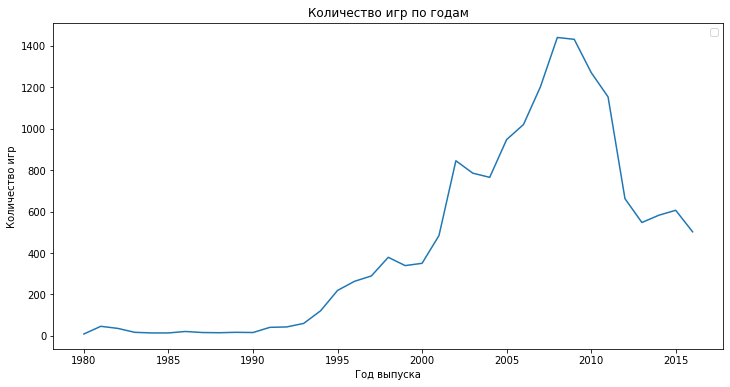

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(data=games_in_year)
plt.ylabel("Количество игр")
plt.xlabel("Год выпуска")
plt.title("Количество игр по годам")
plt.legend('');

In [31]:
#plt.subplots(figsize=(22, 8))
#sns.barplot(x=games_in_year.index, y="name", data=games_in_year, palette="Blues_d")

Исходя из полученного графика видно с 1990 года количество игр начинает расти. Причиной таких данных может быть стремительное развитие компьютерной техники. Пик пришелся на 2008 год, затем наблюдается спад, причиной может послужить развитие телефонов, а следовательно мобильных приложений. Так же можно принять решение, что в последующем анализе данные до 1995 год можно не учитывать.

### Изменние продаж по платформам
Посмотрим как менялись продажи по платформам.

Отсортируем платформы по суммам продаж и выделим платформы с наибольшими продажами

In [32]:
df_new = df.query('year_of_release >= 1995')

In [33]:
platform_sale = df_new.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sale = platform_sale.sort_values(by='total_sales', ascending=False)    
platform_sale.head(10)

,total_sales
platform,
ps2,1247.16
x360,966.61
ps3,935.19
wii,903.31
ds,804.26
ps,721.55
ps4,314.14
gba,313.73
psp,293.57


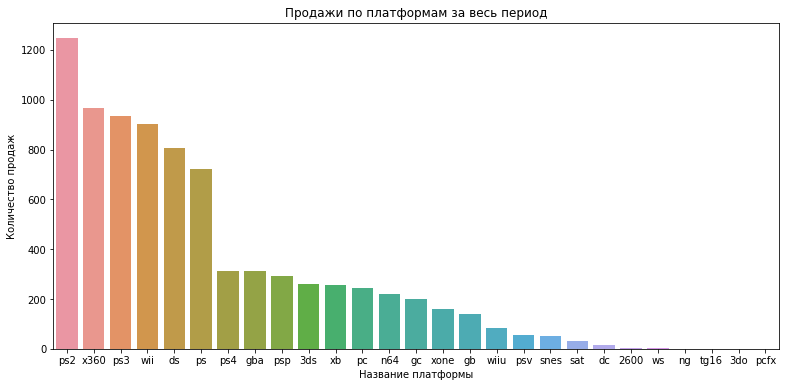

In [34]:
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sale.index, y=platform_sale['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж");
#sns.barplot(x=platform_sale.index, y="total_sales", data=platform_sale)

По данным видно, что самые популярные игровые платформы ps2, x360, ps3, wii, ds, ps


In [35]:
platform_grouped = platform_sale.reset_index().head(10)
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp',
       '3ds'], dtype=object)

Построим гистограммы распределения по годам

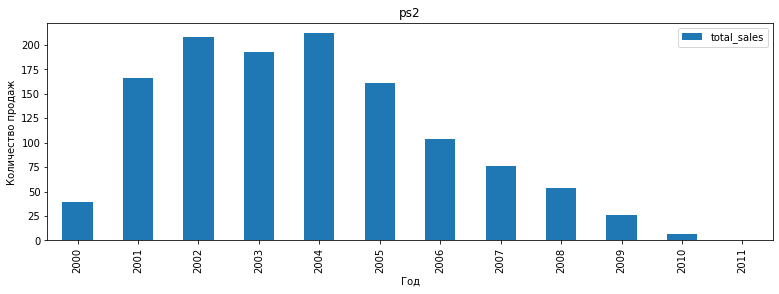

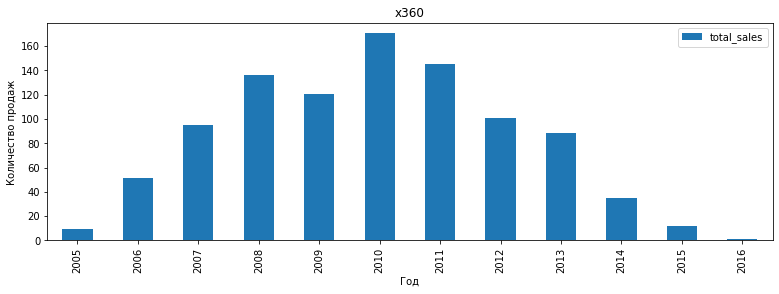

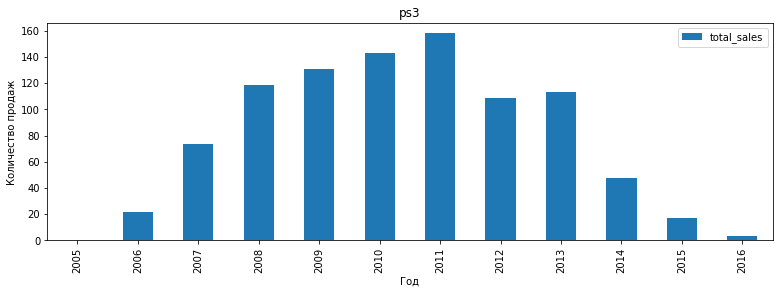

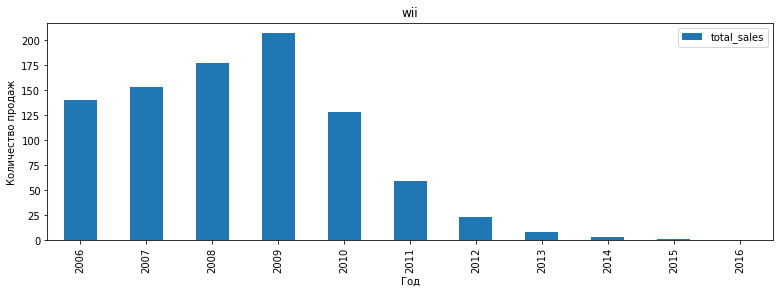

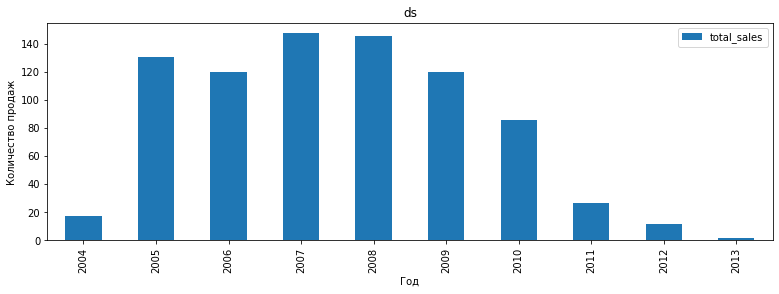

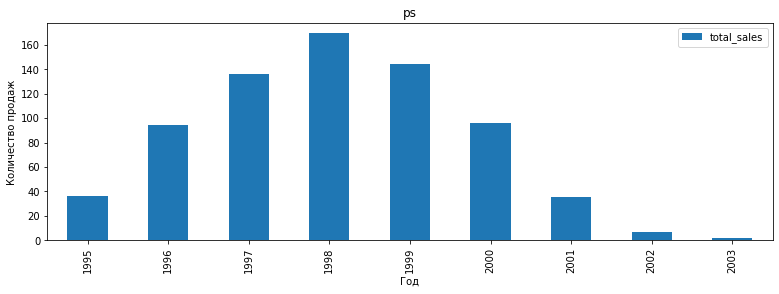

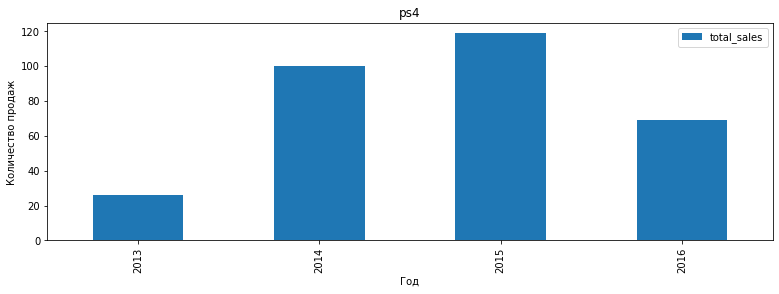

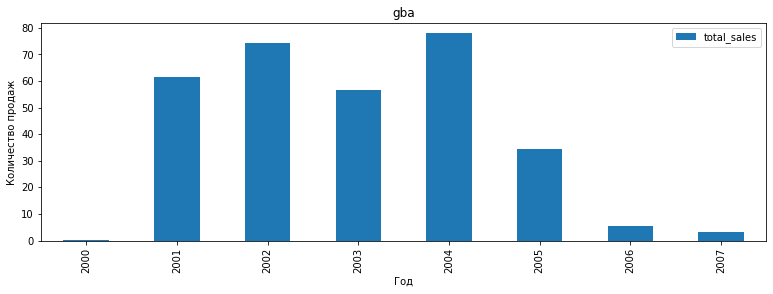

In [36]:
for platform in ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba']:
    df_new[df_new['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)
    plt.xlabel("Год")
    plt.ylabel("Количество продаж");

Исходя из полученных гистограмм распределения получаем, что характерный срок появления и исчезновения платформ равен приблизительно 10 годам. В среднем пик продаж приходится на 4-5 год после появления приставки.
Так же стоит выделить что 6 самых продаваемых платформ уже к 2015 году уже не востребованные.

Платформа ps4 вышла на рынок только в 2013 году, с ней же в этот момент выпустили консоль xone. Рассмотрим распределение продаж по годам.

Найдем объем продаж для каждой платформы по годам и среднюю продолжительность жизни игровой платформы.

In [37]:
time_life = df_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
#time_life

In [40]:
time_life.fillna(0, inplace=True)
#time_life

Cоберем список из количества лет жизни каждой платформы построим график размаха средней продолжительности жизни платформы

In [41]:
len_year=[]
for platform in time_life.columns:
    len_year.append(time_life[platform].ne(0).value_counts().loc[time_life[platform].ne(0).value_counts().index == True].values[0])

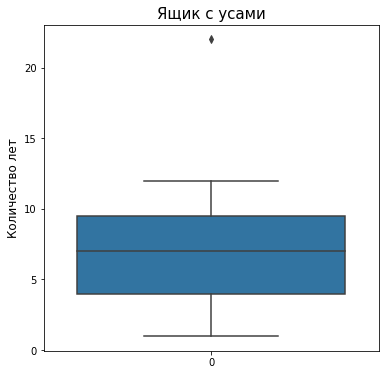

In [42]:
plt.figure(figsize=(6,6))
sns.boxplot(data=len_year)
plt.title('Ящик с усами', fontsize=15)
plt.ylabel('Количество лет',fontsize=12);

Из графика видим, что средняя продолжительность жизни 8 лет

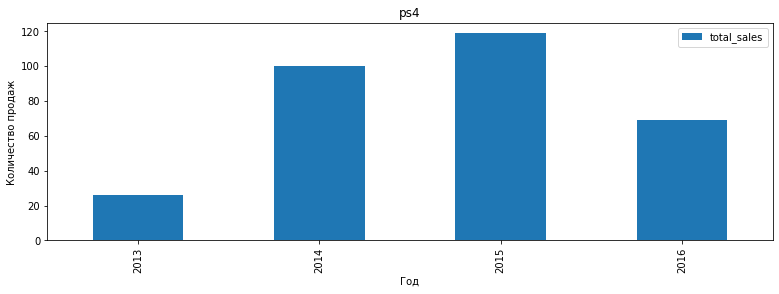

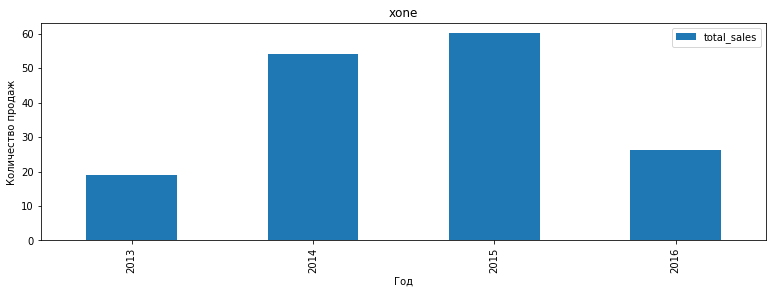

In [43]:
for platform in ['ps4', 'xone']:
    df_new[df_new['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)
    plt.xlabel("Год")
    plt.ylabel("Количество продаж");

### Определение актуального периода
(эти данные помогут построить прогноз на 2017 год.)

Рост продаж большинства платформ наблюдается с 2005 года, затем пик приходится в срднем на 2008 - 2010 года затем начинается спад. Большей части самых продаваемых ранее платформ в 2016 году практически уже нет. Стоит так же уточнить, что данные за 2016 год являются не полными. Возьмем за актуальный период года больше 2009 года, так как до 2008 года наблюдается рост, пик 2008 и 2009 годов, а также сокращение рынка последних годов. Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут. При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии.

In [46]:
period_data = df_new[df_new['year_of_release'] > 2009]

### Платформы лидирующие по продажам и потенциально прибыльные платформы

In [47]:
platform_period_data = period_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
top10_platform = platform_period_data.head(10)
top10_platform

,total_sales
platform,
ps3,590.65
x360,553.30
ps4,314.14
3ds,258.53
wii,225.06
xone,159.32
ds,124.89
pc,124.82
wiiu,82.19


In [48]:
top10_platform = top10_platform.reset_index()
top10_platforms_list = top10_platform['platform'].unique()
top10_platforms_list

array(['ps3', 'x360', 'ps4', '3ds', 'wii', 'xone', 'ds', 'pc', 'wiiu',
       'psp'], dtype=object)

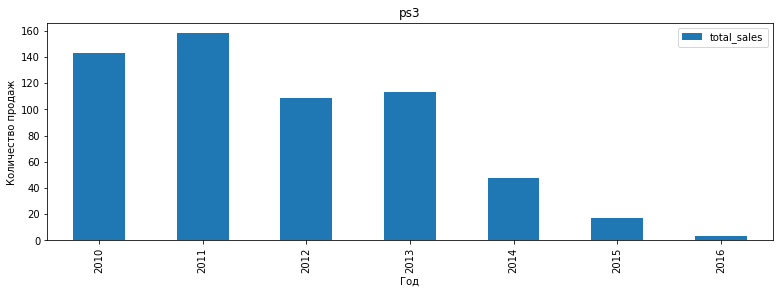

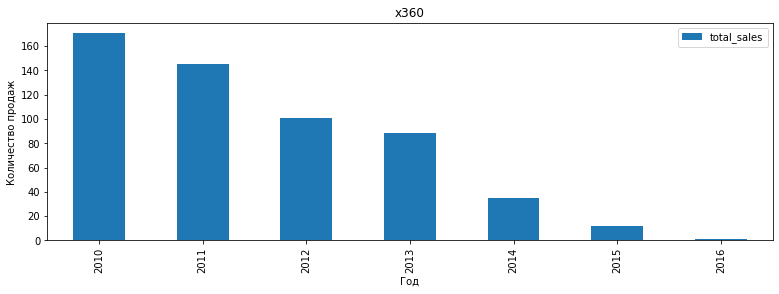

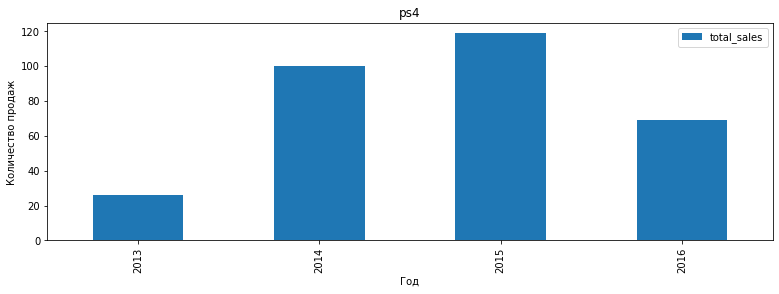

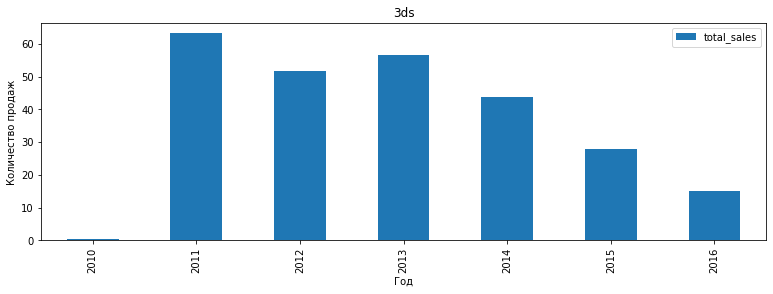

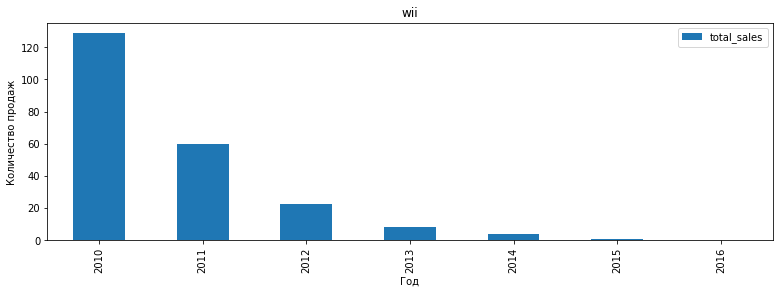

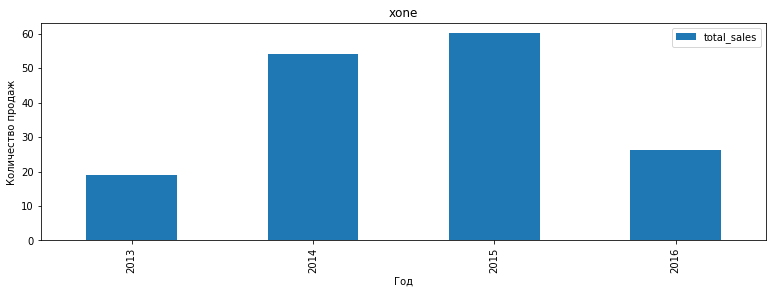

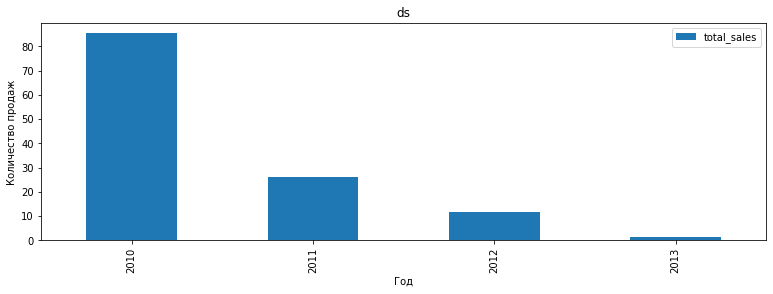

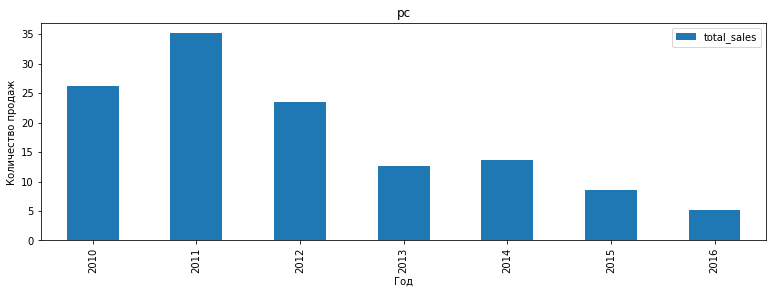

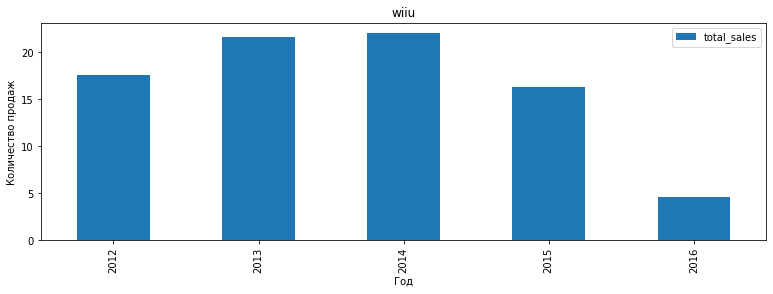

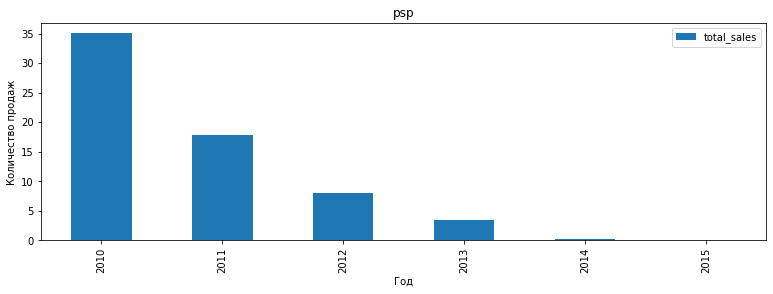

In [49]:
for platform in ['ps3', 'x360', 'ps4', '3ds', 'wii', 'xone', 'ds', 'pc', 'wiiu', 'psp']:
    period_data[period_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)
    plt.xlabel("Год")
    plt.ylabel("Количество продаж");

С 2009 года по продажам лидируют платформы ps3, x360, ps4, 3ds, wii. Исходя из графиков распределения ps4 и  xone считаются потенциально прибыльными платформами.

PS так как поменяли период с 2005 на 2009 видим, что платформы wii, ds сдали позиции.

###  График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Посмотрим выбросы в суммарных продажах

In [50]:
top10_platform_list = ['x360', 'ps3', 'wii', 'ds', 'ps4', 'ps2', '3ds', 'psp', 'pc','xone']
top10_platform_new = period_data[period_data['platform'].isin(top10_platform_list)].sort_values(by='total_sales', ascending=True)
top10_platform_new.head() #выберем только платформы топ 10

#top5_platform_new1 = period_data.query('platform == "ps3" or platform == "x360" or platform == "ps4" or platform == "3ds" or platform == "wii" or platform == "xone"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16217,dodonpachi saidaioujou,x360,2013,shooter,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16214,games around the world,ds,2010,misc,0.01,0.00,0.00,0.0,NaN,NaN,e10+,0.01
16211,gogo's crazy bones,ds,2012,action,0.00,0.01,0.00,0.0,NaN,NaN,e,0.01
16206,kana: imouto,psp,2010,adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01


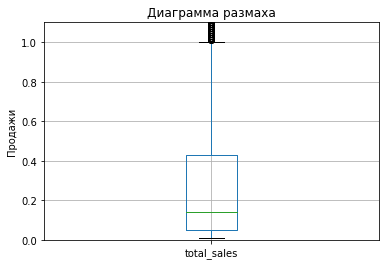

In [51]:
top10_platform_new[['total_sales']].boxplot()
plt.ylim(0, 1.1)
plt.ylabel('Продажи')
plt.title('Диаграмма размаха')
plt.show()

In [52]:
top10_platform_new = top10_platform_new.query('total_sales <= 1')
#top10_platform_new = top10_platform_new[top10_platform_new['total_sales']<1]

In [53]:
top10_platform_new['total_sales'].describe()

count    4206.000000
mean        0.205925
std         0.229021
min         0.010000
25%         0.040000
50%         0.120000
75%         0.280000
max         1.000000
Name: total_sales, dtype: float64

Отрисуем ящики с усами 

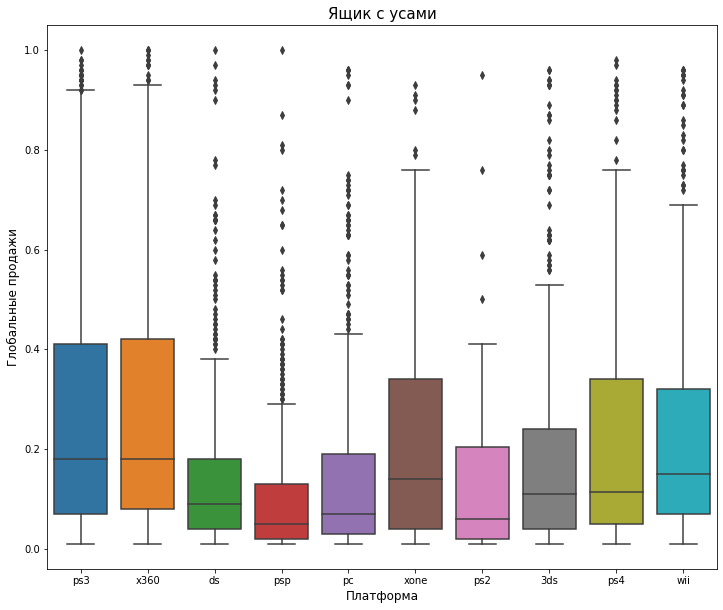

In [54]:
plt.figure(figsize=(12,10))
sns.boxplot(data=top10_platform_new, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

In [55]:
#top10_platform_new.groupby('platform')['total_sales'].describe().sort_values(by='count', ascending=True)

Исходя из графиков видно, что медиана у всех разная. Больше всех продаж наблюдается у ps3 и у x360, затем у xone, wii, ps4. Больше всех наблюдается продаж у игровых консолей, можем сделать вывод, что эра компьютерных игр уходит на вторй план.

 ### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Рассмотрим зависимость продаж от отзывов пользователей и критиков на примере платформы ps3 - лидера по продажам в период 2005-2016 гг. 

Найдем коэффициент корреляции зависимости продаж от отзывов пользовательей

In [56]:
ps3_table = period_data.query('platform == "ps3"')
ps3_table['total_sales'].corr(ps3_table['user_score'])

0.0628508009689048

In [58]:
#df['critic_score'] = df['critic_score'].astype('float')
#df['critic_score'].value_counts()

Найдем коэффициент корреляции зависимости продаж от оценки критиков

In [59]:
ps3_table = period_data.query('platform == "ps3"')
ps3_table['total_sales'].corr(ps3_table['critic_score'])

0.4003894729420608

Построим диаграмму рассеяния

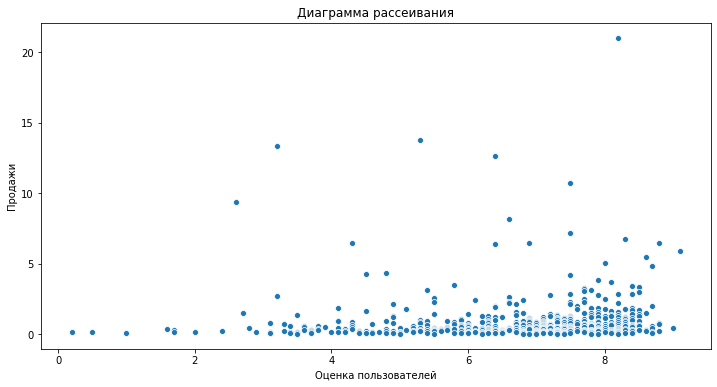

In [60]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=ps3_table, y='total_sales', x='user_score')
plt.title('Диаграмма рассеивания')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи");

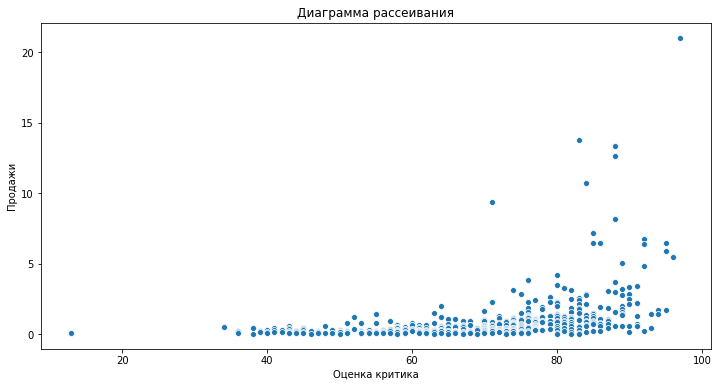

In [61]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=ps3_table, y='total_sales', x='critic_score')
plt.title('Диаграмма рассеивания')
plt.xlabel("Оценка критика")
plt.ylabel("Продажи");

Опираясь на полученные коэффициенты корреляции можно сделать вывод, что отзовы пользователей слабо влияют на продажи (corr = 0,13), а вот оценка критиков несет в себесреднее влияние (corr = 0,43).

Соотнесем выводы с продажами игр на других платформах.

In [62]:
def corr_and_plot(platform_name):
    platform = period_data[period_data['platform'] == platform_name]
    user_corr = platform['total_sales'].corr(platform['user_score'])
    critic_corr = platform['total_sales'].corr(platform['critic_score'])
    print('коэффициент корреляции зависимости продаж от отзывов пользовательей:',user_corr)
    print('коэффициент корреляции зависимости продаж от оценки критиков:',critic_corr)
    
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    #fig.suptitle(platform_name, fontsize=15)
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.title(platform_name)
    plt.show()


коэффициент корреляции зависимости продаж от отзывов пользовательей: 0.06421315072612502
коэффициент корреляции зависимости продаж от оценки критиков: 0.3384722608434017


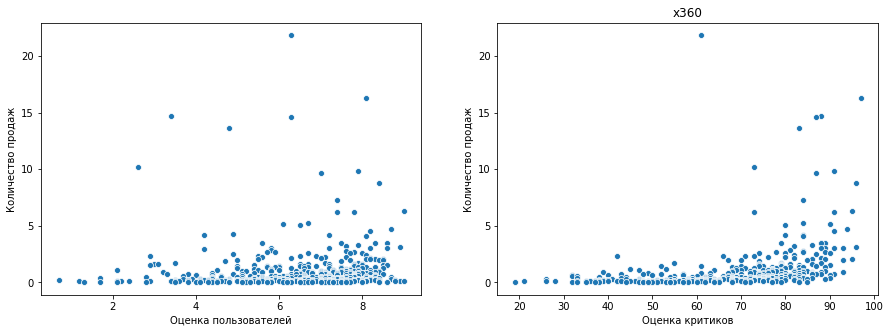

коэффициент корреляции зависимости продаж от отзывов пользовательей: 0.0628508009689048
коэффициент корреляции зависимости продаж от оценки критиков: 0.4003894729420608


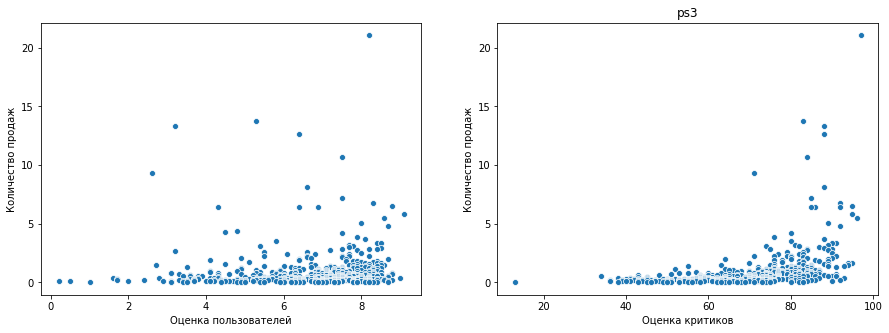

коэффициент корреляции зависимости продаж от отзывов пользовательей: 0.15040071527319085
коэффициент корреляции зависимости продаж от оценки критиков: 0.3112834060821102


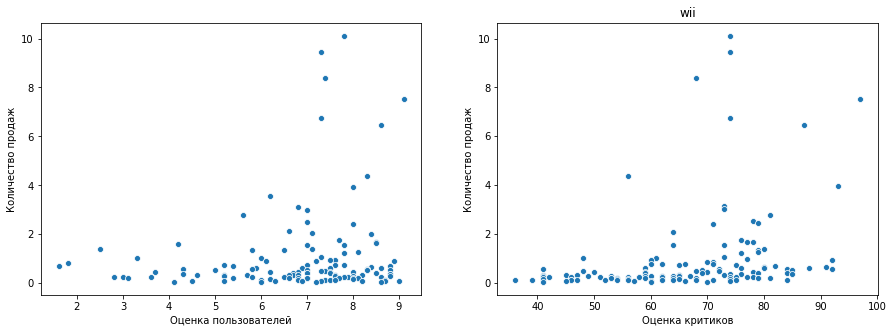

коэффициент корреляции зависимости продаж от отзывов пользовательей: 0.25142811742297444
коэффициент корреляции зависимости продаж от оценки критиков: 0.2769482874574771


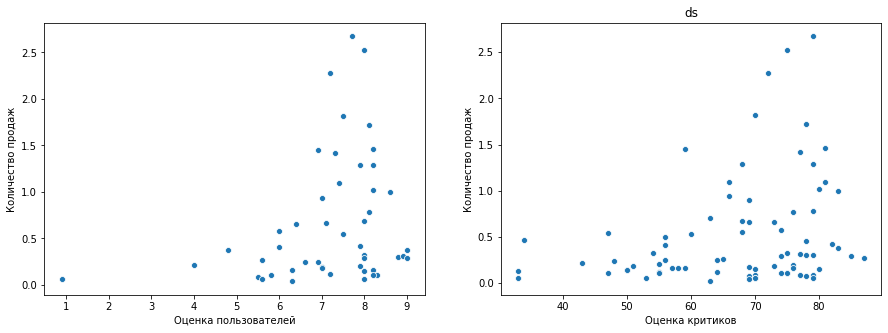

коэффициент корреляции зависимости продаж от отзывов пользовательей: -0.031957110204556424
коэффициент корреляции зависимости продаж от оценки критиков: 0.406567902061781


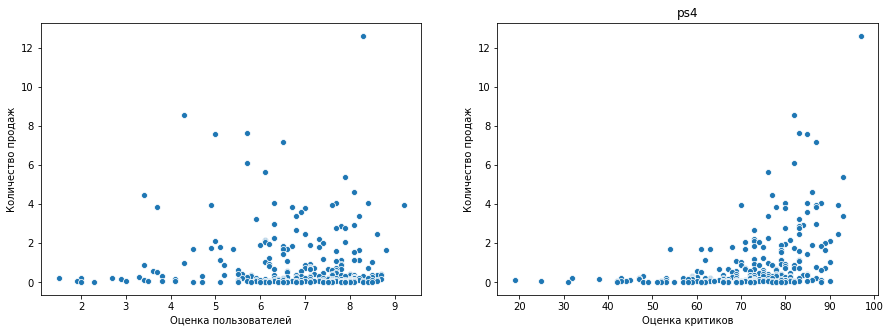

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


коэффициент корреляции зависимости продаж от отзывов пользовательей: 0.07472375514301433
коэффициент корреляции зависимости продаж от оценки критиков: nan


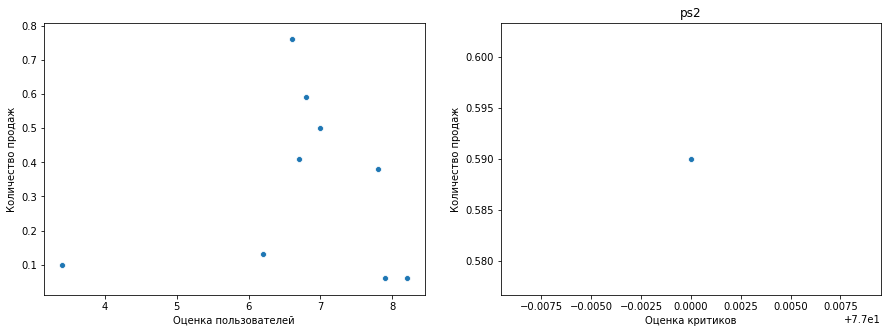

коэффициент корреляции зависимости продаж от отзывов пользовательей: 0.22230511788401197
коэффициент корреляции зависимости продаж от оценки критиков: 0.34821555174929825


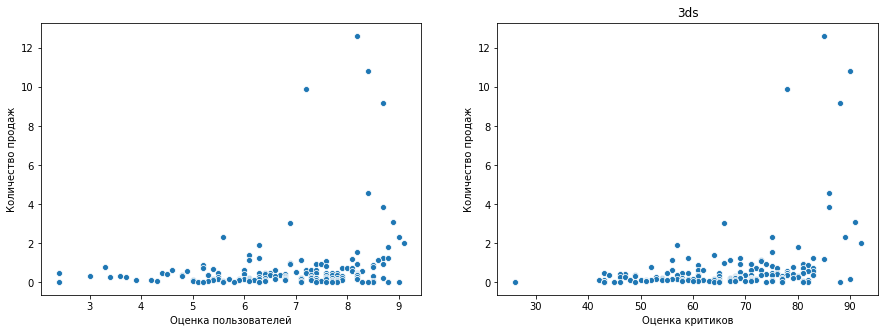

коэффициент корреляции зависимости продаж от отзывов пользовательей: 0.19063632529960092
коэффициент корреляции зависимости продаж от оценки критиков: 0.40322494461167796


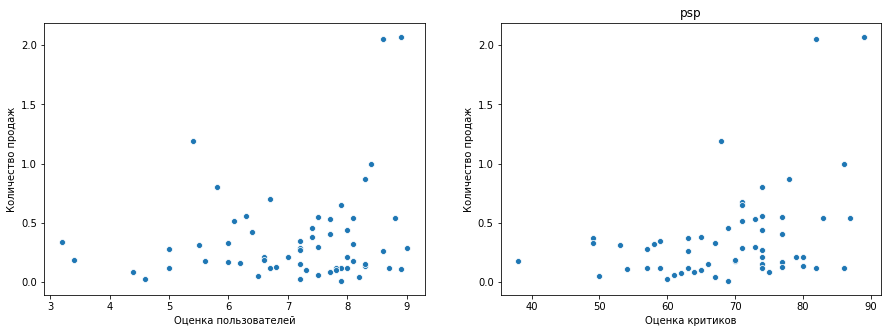

коэффициент корреляции зависимости продаж от отзывов пользовательей: -0.01636530103008556
коэффициент корреляции зависимости продаж от оценки критиков: 0.3372698409157572


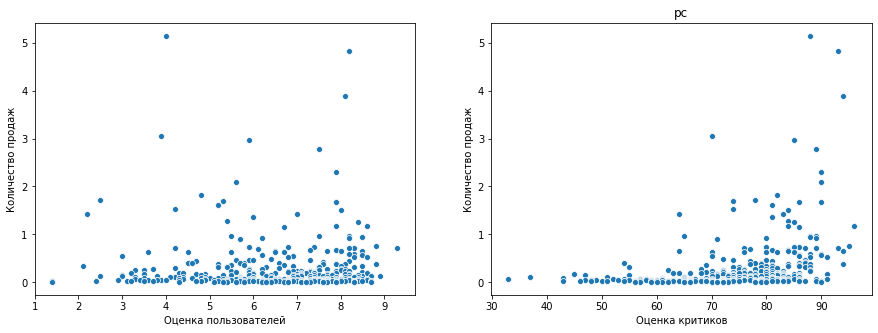

коэффициент корреляции зависимости продаж от отзывов пользовательей: -0.06892505328279412
коэффициент корреляции зависимости продаж от оценки критиков: 0.41699832800840175


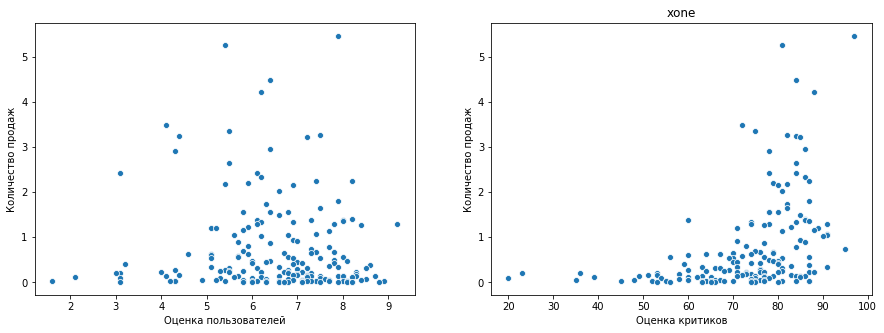

In [63]:
for platform_name in top10_platform_list:
    corr_and_plot(platform_name)

Практически для всех платформ характерно среднее влияние отзывов критиков на продажи и отсутствие влияния отзывов пользователей кроме платформы wii, там практически отсутствует влияние отзывов пользователй и критиков на продажи.

### Общее распределение игр по жанрам

In [64]:
genre_table = top10_platform_new.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_table = genre_table.sort_values('total_sales', ascending=False)

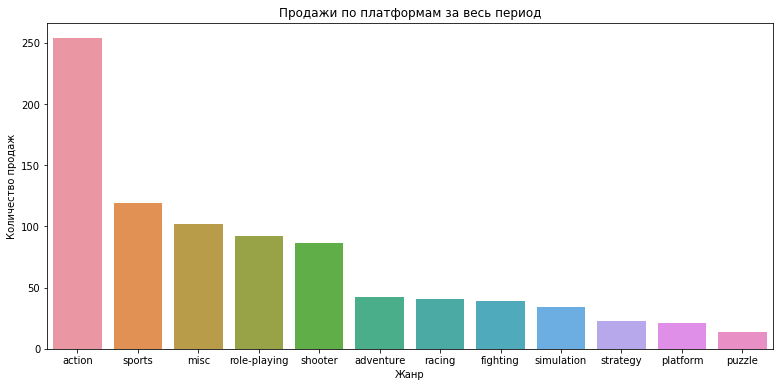

In [65]:
plt.figure(figsize=(13,6))
sns.barplot(x=genre_table.index, y=genre_table['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Жанр")
plt.ylabel("Количество продаж");

Лучше всего продаются жанры action, хуже всего - puzzle. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр.

**Вывод**

- В ходе анализа данных мы вяснили, что с 1990 годов начинает расти количество игр и продолжается это до 2008 года, затем идет спад, скорее всегона это связано с появлением пмобильных приложений.
- Самвые популярные игровые платформы за весь период: ps2, x360, ps3, wii, ds, ps.
- Средняя продолжительность "жизни" игровой платформы составляет 10 лет, где пик продаж приходится приблизительно на 5 год.
- С 2005 года по продажам лидируют платформы x360, ps3. Исходя из графиков распределения ps4 и xone считаются потенциально прибыльными платформами.
- Практически у всех платформ наблюдается небольщая зависимость продаж от оценки критиков. Это значит для людей мнение критиков важнее мнения других пользователей.

## Шаг 4. Портрет пользователя каждого региона

### Северная Америка

,na_sales
platform,
x360,602.47
ps2,583.84
wii,496.90
ps3,393.49
ds,382.40


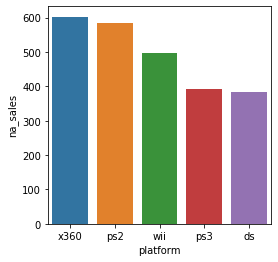

,na_sales
genre,
action,879.01
sports,684.43
shooter,592.24
platform,445.50
misc,407.27


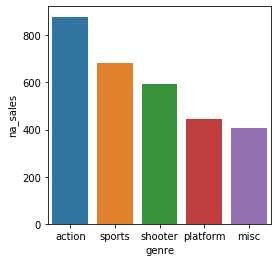

,na_sales
rating,
e,1292.99
t,759.75
m,748.48
e10+,353.32
k-a,2.56


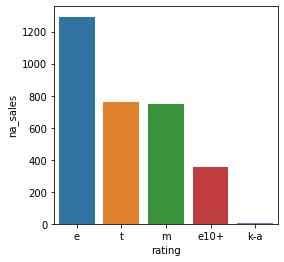

In [66]:
def na(info):
    pivot_table = df.pivot_table(index = info, values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending=False)
    top_5 = pivot_table.head(5)
    display(top_5.head(5))
    
    
    plt.figure(figsize=(4,4))
    sns.barplot(data=top_5.head(5), x=top_5.index, y=top_5['na_sales'])
    plt.show()
    
for info in ['platform', 'genre', 'rating']:
    na(info)

,na_sales
platform,
x360,335.93
ps3,230.47
wii,122.68
ps4,108.74
xone,93.12


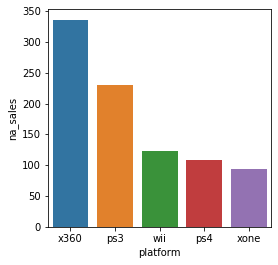

,na_sales
genre,
action,294.26
shooter,238.50
sports,157.49
misc,124.39
role-playing,112.05


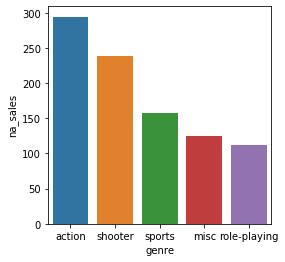

,na_sales
rating,
m,384.23
e,272.93
e10+,161.61
t,161.21
ec,1.13


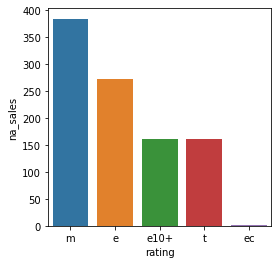

In [67]:
def na(info):
    pivot_table = period_data.pivot_table(index = info, values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending=False)
    top_5 = pivot_table.head(5)
    display(top_5.head(5))
    
    
    plt.figure(figsize=(4,4))
    sns.barplot(data=top_5.head(5), x=top_5.index, y=top_5['na_sales'])
    plt.show()
    
for info in ['platform', 'genre', 'rating']:
    na(info)

- Самые популярные игровые платформы за все время: x360, ps2, wii, ps3, ds
- Самые популярные жанры за все время: action, sports, shooter, platform, msic
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "подросткам", на третьем "для взрослых", затем "для всех от 10 лет и старше" и "для детей"
________________________________________________
- Самые популярные игровые платформы за актуальный период: x360, wii, ps3, ds, ps2
- Самые популярные жанры за актуальный период: action, sports, shooter, msic, role-playing
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "для взрослых", на третьем "подросткам", затем "для всех от 10 лет и старше" и "для детей младшего возраста"

Продажи игр без рейтинга в Северной Америке.

In [68]:
not_rating= period_data[period_data['rating'].isna()]
#not_rating_na

In [69]:
not_rating.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
        by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,platform,na_sales
0,3ds,30.35
1,ps4,23.77
2,x360,21.74
3,ds,20.19
4,ps3,20.09


In [70]:
not_rating.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
        by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,genre,na_sales
0,action,36.04
1,role-playing,33.99
2,shooter,22.76
3,misc,19.77
4,fighting,8.50


- Самые популярные игровые платформы по данным без рейтинга: 3ds, ps4, x360, ds, ps3
- Самые популярные жанры по данным без рейтинга: action, role-playing, shooter, msic, fighting

### Европа

,eu_sales
platform,
ps2,339.29
ps3,330.29
x360,270.76
wii,262.21
ps,213.61


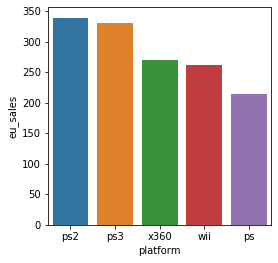

,eu_sales
genre,
action,519.13
sports,376.79
shooter,317.34
racing,236.51
misc,212.74


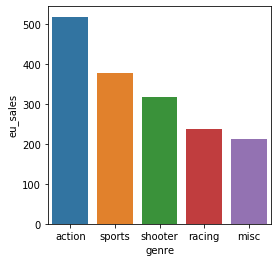

,eu_sales
rating,
e,710.25
m,483.97
t,427.03
e10+,188.52
ao,0.61


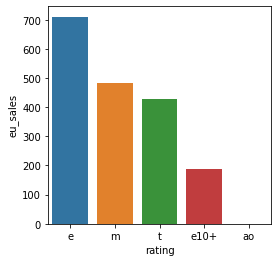

In [71]:
def eu(info):
    pivot_table = df.pivot_table(index = info, values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending=False)
    top_5 = pivot_table.head(5)
    display(top_5.head(5))
    
    
    plt.figure(figsize=(4,4))
    sns.barplot(data=top_5.head(5), x=top_5.index, y=top_5['eu_sales'])
    plt.show()
    
for info in ['platform', 'genre', 'rating']:
    eu(info)

,eu_sales
platform,
ps3,214.74
x360,164.29
ps4,141.09
pc,70.50
wii,66.35


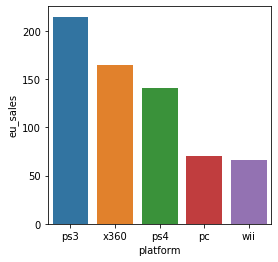

,eu_sales
genre,
action,236.70
shooter,172.57
sports,117.09
role-playing,75.48
misc,66.55


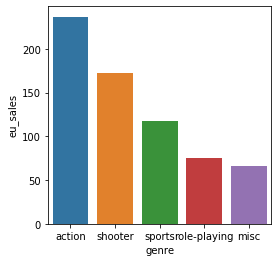

,eu_sales
rating,
m,294.29
e,197.98
t,113.29
e10+,101.16
rp,0.03


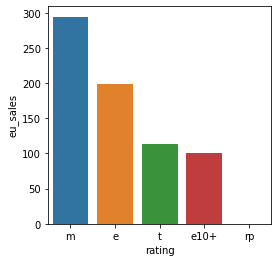

In [72]:
def eu(info):
    pivot_table = period_data.pivot_table(index = info, values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending=False)
    top_5 = pivot_table.head(5)
    display(top_5.head(5))
    
    
    plt.figure(figsize=(4,4))
    sns.barplot(data=top_5.head(5), x=top_5.index, y=top_5['eu_sales'])
    plt.show()
    
for info in ['platform', 'genre', 'rating']:
    eu(info)

- Самые популярные игровые платформы за все время: ps3, x360, wii, ds, ps4
- Самые популярные жанры за все время: action, sports, shooter, msic, racing
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "для взрослых", на третьем "подросткам", затем "для всех от 10 лет и старше" и "только для взрослых"
________________________________________________
- Самые популярные игровые платформы за актуальный период: x360, wii, ps3, ds, ps2
- Самые популярные жанры за актуальный период: action, sports, shooter, msic, role-playing
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "для взрослых", на третьем "подросткам", затем "для всех от 10 лет и старше" и "рейтинг ожидается"

Продажи игр без рейтинга в Европе.

In [73]:
not_rating.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
        by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,platform,eu_sales
0,ps4,27.99
1,3ds,25.02
2,ps3,24.85
3,x360,14.50
4,ds,11.42


In [74]:
not_rating.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
        by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,genre,eu_sales
0,action,29.00
1,role-playing,23.35
2,shooter,19.03
3,misc,17.93
4,sports,16.38


- Самые популярные игровые платформы по данным без рейтинга: ps4, 3ds, ps3, x360, ds
- Самые популярные жанры по данным без рейтинга: action, role-playing, shooter, msic, sports

### Япония

,jp_sales
platform,
ds,175.57
ps,139.82
ps2,139.20
snes,116.55
3ds,100.67


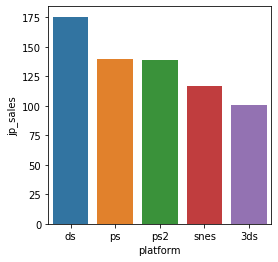

,jp_sales
genre,
role-playing,355.41
action,161.43
sports,135.54
platform,130.83
misc,108.11


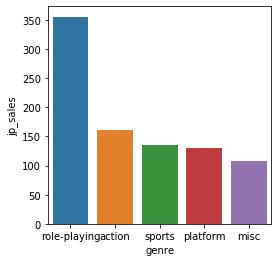

,jp_sales
rating,
e,198.11
t,151.40
m,64.24
e10+,40.20
k-a,1.46


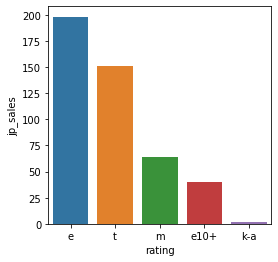

In [75]:
def jp(info):
    pivot_table = df.pivot_table(index = info, values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending=False)
    top_5 = pivot_table.head(5)
    display(top_5.head(5))
    
    
    plt.figure(figsize=(4,4))
    sns.barplot(data=top_5.head(5), x=top_5.index, y=top_5['jp_sales'])
    plt.show()
    
for info in ['platform', 'genre', 'rating']:
    jp(info)
    

,jp_sales
platform,
3ds,100.64
ps3,59.36
psp,42.44
ds,27.90
psv,21.84


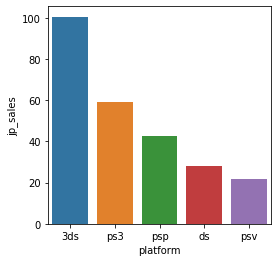

,jp_sales
genre,
role-playing,103.59
action,72.21
misc,24.54
platform,15.81
adventure,15.67


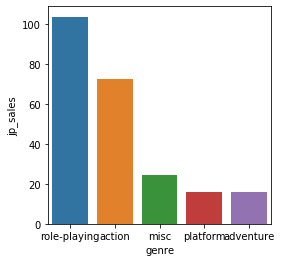

,jp_sales
rating,
e,47.87
t,42.14
m,30.47
e10+,13.22
ec,0.00


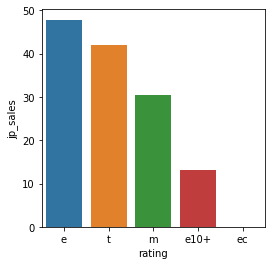

In [76]:
def jp(info):
    pivot_table = period_data.pivot_table(index = info, values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending=False)
    top_5 = pivot_table.head(5)
    display(top_5.head(5))
    
    
    plt.figure(figsize=(4,4))
    sns.barplot(data=top_5.head(5), x=top_5.index, y=top_5['jp_sales'])
    plt.show()
        
for info in ['platform', 'genre', 'rating']:
    jp(info)
    

- Самые популярные игровые платформы за все время: ds, ps, ps2, snes, 3ds
- Самые популярные жанры за все время: role-playing, action, sports, platform, msic
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "подросткам", на третьем "для взрослых", затем "для всех от 10 лет и старше" и "для детей"
________________________________________________
- Самые популярные игровые платформы за актуальный период: ds, 3ds, ps3, psp, wii
- Самые популярные жанры за актуальный период: role-playing, action, msic, sports, platform
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "подросткам", на третьем "для взрослых", затем "для всех от 10 лет и старше" и "для детей младшего возраста"

Продажи игр без рейтинга в Японии.

In [77]:
not_rating.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
        by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,platform,jp_sales
0,3ds,65.70
1,psp,35.64
2,ds,20.65
3,ps3,17.71
4,psv,13.09


In [78]:
not_rating.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
        by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(5)

,genre,jp_sales
0,role-playing,70.90
1,action,37.34
2,misc,15.57
3,adventure,13.72
4,sports,9.07


- Самые популярные игровые платформы по данным без рейтинга: 3ds, psp, ds, ps3, psv
- Самые популярные жанры по данным без рейтинга: role-playing, action, msic, adventure, sports

Картина портретов пользователей Северной Америки и Европы без рейтинга схожа, а вот портрет пользователей Японии отличается.

## Шаг 5. Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

𝐻0  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

𝐻1 — средние пользовательские рейтинги платформ Xbox One и PC различаются.

𝛼=5%

In [79]:
df_xone = period_data[period_data['platform']=='xone']['user_score']
df_pc = period_data[period_data['platform']=='pc']['user_score']

In [80]:
print(df_xone.mean(), '///', df_xone.var())
print(df_pc.mean(), '///', df_pc.var())

6.521428571428572 /// 1.9069968429360695
6.529242819843342 /// 2.4324934042349597


Дисперсии отличаются, значит примем величину equal_var = False

In [81]:
alpha = .05
results = st.ttest_ind(df_xone.dropna(), df_pc.dropna(), equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.9519979495147267
Не получилось отвергнуть нулевую гипотезу


Значение p-value равно 95%. Таким образом, средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

### Средние пользовательские рейтинги жанров Action и Sports разные.

𝐻0  — средние пользовательские рейтинги жанров Action и Sports одинаковые.

𝐻1 — средние пользовательские рейтинги жанров Action и Sports различаются.

𝛼=5%

In [82]:
df_action = period_data[period_data['genre']=='action']['user_score']
df_sports = period_data[period_data['genre']=='sports']['user_score']

In [83]:
print(df_action.mean(), '///', df_action.var())
print(df_sports.mean(), '///', df_sports.var())

6.7897597977244 /// 1.839300068812111
5.9 /// 2.827428571428572


Дисперсии отличаются, значит примем величину equal_var = False

In [84]:
alpha = .05
results = st.ttest_ind(df_action.dropna(), df_sports.dropna(), equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 5.704356296291296e-16
Отвергаем нулевую гипотезу


Получив p-value, мы отвергли нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

**Вывод**

Проверили гипотезы по функции ttest_ind, вычисляющей t-тест двух независимых выборок:
- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Отвергаем нулевую гипотезу.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

## Шаг 6. Общий вывод

   - Изначально мы подготовили наши данные: привели к нижнему регистру названия столбцов и  данные таблицы, привели к нужным типам данных выборочные столбцы, где это было необходимо,разобрались с некоторыми пропусками, проверили данные на дубликаты.
   - Проведя анализ данных мы выяяснили, что количество игр на игровые платформы начало стремильено расти 1990 года и достигло пика в 2008 году, а затем пошел спад, скорее всего связанный с развитием мобильных телефонов и мобильных игр.
   - За весь период с 1990 года самые популярные игровые платформы ps2, x360, ps3, wii, ds, ps. Средняя продолжительность существования игры на рынке составила около 10 лет, где пик продаж приходится на 4-5 года.
   - Проведя анализ влияния оценок пользователей и критиков на продажу игровых платформ мы выявили, что оценки критиков немного влияют на продажу. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
   - Из общего распределения игр по жанрам были выявлены самый популярный жанр - action.
   - Составив портреты пользователей каждого региона (Северная Америка, Европа, Япония) мы выяснили,что пользовательские портреты Северной Америки и Европы практически идентичны , а вот пользовательский портрет Японии отличается от вышеупомянутых континетов.
   - На последнем этапе были проверены гипотезы откуда стало ясно, что что лучше всего делать упор на игры которые базируются на игровые платформы ps4 и xone (скорее всего в дальнейшем это станут основные линии платформ) жанра action и sports и рейтиногм "для всех", "для взрослых" и "подросткам"